Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/aidanandres/anaconda3/lib/python3.11/tkinter/__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "/var/folders/2v/_1r788p15jnbfsjj_jkbysjr0000gn/T/ipykernel_24092/2984564349.py", line 137, in <lambda>
    command=lambda: raise_specific(variable_selection.get()))
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/var/folders/2v/_1r788p15jnbfsjj_jkbysjr0000gn/T/ipykernel_24092/2984564349.py", line 80, in raise_specific
    raise_poverty()
  File "/var/folders/2v/_1r788p15jnbfsjj_jkbysjr0000gn/T/ipykernel_24092/2984564349.py", line 65, in raise_poverty
    graph_frame_4.tkraise()
  File "/Users/aidanandres/anaconda3/lib/python3.11/tkinter/__init__.py", line 1077, in tkraise
    self.tk.call('raise', self._w, aboveThis)
_tkinter.TclError: can't invoke "raise" command: application has been destroyed
2024-05-09 00:09:02.694 python[24092:22741280] 

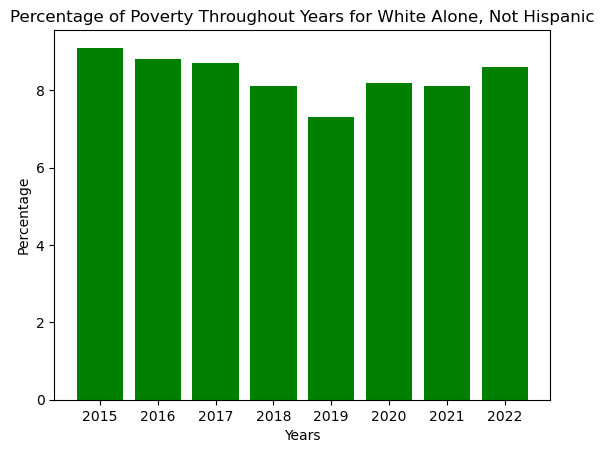

In [12]:
from tkinter import * 
import requests 
import json 
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.figure import *
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg, NavigationToolbar2Tk) 
from PIL import ImageTk, Image


global API_key
API_key = "33459c97af47380e6c0b1a3a6f1f29e035201aa0"


# Thanks for this Dane, I kinda took this dictionary from your code.
state_code_dict = {
'Alabama': '01', 'Alaska': '02', 'Arizona': '04',
'Arkansas': '05', 'California': '06', 'Colorado': '08',
'Connecticut': '09', 'Delaware': '10', 'District of Columbia': '11',
'Florida': '12', 'Georgia': '13', 'Hawaii': '15',
'Idaho': '16', 'Illinois': '17', 'Indiana': '18', 
'Iowa': '19', 'Kansas': '20', 'Kentucky': '21',
'Louisiana': '22', 'Maine': '23', 'Maryland': '24',
'Massachusetts': '25', 'Michigan': '26', 'Minnesota': '27',
'Mississippi': '28', 'Missouri': '29', 'Montana': '30',
'Nebraska': '31', 'Nevada': '32', 'New Hampshire': '33',
'New Jersey': '34', 'New Mexico': '35', 'New York': '36',
'North Carolina': '37', 'North Dakota': '38', 'Ohio': '39',
'Oklahoma': '40', 'Oregon': '41', 'Pennsylvania': '42',
'Rhode Island': '44', 'South Carolina': '45', 'South Dakota': '46',
'Tennessee': '47', 'Texas': '48', 'Utah': '49',
'Vermont': '50', 'Virginia': '51', 'Washington': '53',
'West Virginia': '54', 'Wisconsin': '55', 'Wyoming': '56',
'American Samoa': '60', 'Guam': '66', 'Northern Mariana Islands': '69',
'Puerto Rico': '72', 'Virgin Islands': '78',
'Al': '01', 'Ak': '02', 'Az': '04', 'Ar': '05', 'Ca': '06', 'Co': '08',
'Ct': '09', 'De': '10', 'Fl': '12', 'Ga': '13', 'Hi': '15', 'Id': '16', 'Il': '17', 
'In': '18', 'Ia': '19', 'Ks': '20', 'Ky': '21', 'La': '22', 'Me': '23',
'Md': '24', 'Ma': '25', 'Mi': '26', 'Mn': '27', 'Ms': '28', 'Mo': '29', 'Mt': '30',
'Ne': '31', 'Nv': '32', 'Nh': '33', 'Nj': '34', 'Nm': '35', 'Ny': '36',
'Nc': '37', 'Nd': '38', 'Oh': '39', 'Ok': '40', 'Or': '41', 'Pa': '42', 'Ri': '44',
'Sc': '45', 'Sd': '46', 'Tn': '47', 'Tx': '48', 'Ut': '49', 'Vt': '50',
'Va': '51', 'Wa': '53', 'Wv': '54', 'Wi': '55', 'Wy': '56'
}


def raise_frame_general(frame):
    frame.tkraise()
def raise_blank():
    graph_frame_blank.tkraise()
    data_info_frame_blank.tkraise()
def raise_unem_bach():
    Unemployment_With_Bachelors_Degree_2_States.tkraise()
    graph_frame_1.tkraise()
def raise_total_unem():
    Total_Unemployment_2_States.tkraise()
    graph_frame_2.tkraise()
def raise_insurance():
    Percent_With_Health_Insurance_2_States.tkraise()
    graph_frame_3.tkraise()
def raise_poverty():
    Poverty_Statistics_By_Race.tkraise()
    graph_frame_4.tkraise()
def raise_col():
    Median_Home_Price.tkraise()
    graph_frame_5.tkraise()
def raise_all_unem_one_state():
    All_Unemployment_Data_One_State.tkraise()
    graph_frame_6.tkraise()
def raise_specific(variable):
    if variable == "Unemployment_With_Bachelors_Degree_2_States":
        raise_unem_bach()
    elif variable == "Total_Unemployment_2_States":
        raise_total_unem()
    elif variable == "Percent_With_Health_Insurance_2_States":
        raise_insurance()
    elif variable == "Poverty_Statistics_By_Race":
        raise_poverty()
    elif variable == "Median_Home_Price":
        raise_col()
    elif variable == "All_Unemployment_Data_One_State":
        raise_all_unem_one_state()
    else:
        pass


root = Tk()
root.title("HARP 151 Final Project - Census Bureau GUI")
root.geometry("1400x850")


main_frame = Frame(root, height=850, width=1400)
main_frame.pack()


#####################################################################################################
# making everything for title frame
title_frame = Frame(main_frame, height=50, width=1400)
title_frame.grid(row=0, column=0)
title_frame_1 = Frame(title_frame, height=50, width=700, bg="steel blue")
title_frame_1.grid(row=0, column=0)
title_frame_1.pack_propagate(False)
title_frame_2 = Frame(title_frame, height=50, width=700, bg="steel blue")
title_frame_2.grid(row=0, column=1)
title_frame_2.pack_propagate(False)
title_1_label = Label(title_frame_1, text="Welcome To Our Economic Data GUI! Directions As Follows", bg="steel blue",
                     font=("URW Bookman L", 16))
title_1_label.place(relx=.5, rely=.5, anchor="center")
title_2_label = Label(title_frame_2, text="All Data Taken From The US Census Bureau API \nPlease Please Give the Program ~10 Seconds to Run",
                      bg="steel blue", font=("URW Bookman L", 15))
title_2_label.place(relx=.5, rely=.5, anchor="center")


#####################################################################################################
# making everything for data selection frame
data_selection_frame = Frame(main_frame, height=50, width=1400, bg="blue")
data_selection_frame.grid(row=1, column=0)
data_selection_frame_1 = Frame(data_selection_frame, height=50, width=700, bg="grey")
data_selection_frame_2 = Frame(data_selection_frame, height=50, width=700, bg="grey")
data_selection_frame_1.grid(row=0, column=0)
data_selection_frame_1.pack_propagate(False)
data_selection_frame_2.grid(row=0, column=1)
data_selection_frame_2.pack_propagate(False)
data_selection_label = Label(data_selection_frame_1, text="Select Data You Would Like To See -->",
                             font=("URW Bookman L", 16), bg="grey")
data_selection_label.place(relx=.5, rely=.5, anchor="center")
variable_selection = StringVar()
variable_selection.set("Select Variable")
variables = ["Unemployment_With_Bachelors_Degree_2_States", "Total_Unemployment_2_States", 
             "All_Unemployment_Data_One_State", "Percent_With_Health_Insurance_2_States", 
             "Poverty_Statistics_By_Race", "Median_Home_Price"]
data_selection_dropdown = OptionMenu(data_selection_frame_2, variable_selection, *variables)
data_selection_dropdown.place(relx=.35, rely=.5, anchor="center")
data_selection_button = Button(data_selection_frame_2, text="Select Option",
                              command=lambda: raise_specific(variable_selection.get()))
data_selection_button.place(relx=.65, rely=.5, anchor="center")
return_to_blank_button = Button(data_selection_frame_2, text="Reset",
                               command=raise_blank)
return_to_blank_button.place(relx=.8, rely=.5, anchor="center")


#####################################################################################################
# making data info frames
data_info_frame_blank = Frame(main_frame, height=100, width=1400, bg="grey")
data_info_frame_blank.grid(row=2, column=0)
Unemployment_With_Bachelors_Degree_2_States = Frame(main_frame, height=100, width=1400, bg="grey")
Unemployment_With_Bachelors_Degree_2_States.grid(row=2, column=0)
Unemployment_With_Bachelors_Degree_2_States.pack_propagate(False)
All_Unemployment_Data_One_State = Frame(main_frame, height=100, width=1400, bg="grey")
All_Unemployment_Data_One_State.grid(row=2, column=0)
All_Unemployment_Data_One_State.pack_propagate(False)
Total_Unemployment_2_States = Frame(main_frame, height=100, width=1400, bg="grey")
Total_Unemployment_2_States.grid(row=2, column=0)
Total_Unemployment_2_States.pack_propagate(False)
Percent_With_Health_Insurance_2_States = Frame(main_frame, height=100, width=1400, bg="grey")
Percent_With_Health_Insurance_2_States.grid(row=2, column=0)
Percent_With_Health_Insurance_2_States.pack_propagate(False)
Poverty_Statistics_By_Race = Frame(main_frame, height=100, width=1400, bg="grey")
Poverty_Statistics_By_Race.grid(row=2, column=0)
Poverty_Statistics_By_Race.pack_propagate(False)
Median_Home_Price = Frame(main_frame, height=100, width=1400, bg="grey")
Median_Home_Price.grid(row=2, column=0)
Median_Home_Price.pack_propagate(False)


#####################################################################################################
# defining state choice
single_state_choice = StringVar()
single_state_choice.set("")
state1choice = StringVar()
state1choice.set("")
state2choice = StringVar()
state2choice.set("")


#####################################################################################################
# Unemployment with Bachelors Data Section
data_info_label_1 = Label(Unemployment_With_Bachelors_Degree_2_States, text="Input Two States For Comparing \nUnemployment With Bachelors\nState Abbreviations Accepted",
                         bg="grey", font=("URW Bookman L", 14))
data_info_label_1.place(relx=.15, rely=.5, anchor="center")
data_info_entry_1 = Entry(Unemployment_With_Bachelors_Degree_2_States, width=40, borderwidth=5, justify=CENTER,
                          textvariable=state1choice)
data_info_entry_1.place(relx=.4, rely=.5, anchor="center")
and_label = Label(Unemployment_With_Bachelors_Degree_2_States, text="+", font=("URW Bookman L", 14), bg="grey")
and_label.place(relx=.5, rely=.5, anchor="center")
data_info_entry_2 = Entry(Unemployment_With_Bachelors_Degree_2_States, width=40, borderwidth=5, justify=CENTER,
                         textvariable=state2choice)
data_info_entry_2.place(relx=.6, rely=.5, anchor="center")
data_info_select_button_1 = Button(Unemployment_With_Bachelors_Degree_2_States, text="Select",
                                command=lambda: unemployment_by_state_bachelors(state1choice.get(), state2choice.get()))
data_info_select_button_1.place(relx=.8, rely=.5, anchor="center")
def unemployment_by_state_bachelors(state1choice, state2choice):
    graph_frame_1 = Frame(main_frame, height=650, width=1400, bg="slate grey")
    graph_frame_1.grid(row=3, column=0)
    graph_frame_1.destroy()
    graph_frame_1 = Frame(main_frame, height=650, width=1400, bg="slate grey")
    graph_frame_1.grid(row=3, column=0)
    state1choice = state1choice.title().strip()
    state2choice = state2choice.title().strip()
    state1 = state_code_dict[state1choice]
    state2 = state_code_dict[state2choice]
    state_list = [state1choice, state2choice]
    csv_file1 = open("Prototype Data 1.csv", "w", newline="", encoding="utf-8")
    csv_writer1 = csv.writer(csv_file1)
    csv_writer1.writerow(["State", "Unemployment Rate Age 25-62 w/ Bachelors Degree", 
                         "State Code", "Year"])
    csv_file2 = open("Prototype Data 2.csv", "w", newline="", encoding="utf-8")
    csv_writer2 = csv.writer(csv_file2)
    csv_writer2.writerow(["State", "Unemployment Rate Age 25-62 w/ Bachelors Degree", 
                         "State Code", "Year"])
    csv_file7=open("Prototype Data 7.csv", "w", newline="", encoding="utf-8")
    csv_writer7=csv.writer(csv_file7)
    csv_writer7.writerow(["State", "Unemployment Rate Age 25-62 w/ Bachelors Degree", 
                         "State Code", "Year"])
    for year in range(2015, 2023):
        year=year
        url = f"https://api.census.gov/data/{year}/acs/acs5/subject?get=NAME,S2301_C04_035E&for=state:{state1}&key={API_key}"
        census_data = requests.get(url)
        json_file = census_data.json()
        csv_writer1.writerow([json_file[1][0], json_file[1][1], json_file[1][2], year])
        url = f"https://api.census.gov/data/{year}/acs/acs5/subject?get=NAME,S2301_C04_035E&for=state:{state2}&key={API_key}"
        census_data = requests.get(url)
        json_file = census_data.json()
        csv_writer2.writerow([json_file[1][0], json_file[1][1], json_file[1][2], year])
        url=f"https://api.census.gov/data/{year}/acs/acs5/subject?get=NAME,S2301_C04_035E&for=us:*&key={API_key}"
        census_data=requests.get(url)
        json_file=census_data.json()
        csv_writer7.writerow(["National", json_file[1][1], "National", year])
    csv_file1.close()
    csv_file2.close()
    csv_file7.close()
    df1 = pd.read_csv("Prototype Data 1.csv")
    df2 = pd.read_csv("Prototype Data 2.csv")
    df3=pd.read_csv("Prototype Data 7.csv")
    fig = Figure(figsize = (10, 5), 
                 dpi = 100)
    x = df1["Year"]
    y1 = df1["Unemployment Rate Age 25-62 w/ Bachelors Degree"]
    y2 = df2["Unemployment Rate Age 25-62 w/ Bachelors Degree"]
    y3 = df3["Unemployment Rate Age 25-62 w/ Bachelors Degree"]
    plot1 = fig.add_subplot(111)
    plot1.plot(x, y1, label=f"{state1choice}", marker="D")
    plot1.plot(x, y2, label=f"{state2choice}", marker="v")
    plot1.plot(x,y3,label="National", marker="o")
    plot1.legend(loc="upper right")
    plot1.set_title(f"{state1choice} and {state2choice} Unemployment Data w/ Bachelors")
    plot1.set_xlabel("Year")
    plot1.set_ylabel("Unemployment Rate Age 25-62 w/ Bachelors Degree")
    canvas = FigureCanvasTkAgg(fig,
                              master=graph_frame_1)
    canvas.draw()
    canvas.get_tk_widget().pack()
    toolbar = NavigationToolbar2Tk(canvas,
                                  graph_frame_1)
    toolbar.update()
    canvas.get_tk_widget().pack()
    
    
#####################################################################################################
# Total Unemployment Data Section
data_info_label_2 = Label(Total_Unemployment_2_States, text="Input Two States For Comparing \nTotal Unemployment\nState Abbreviations Accepted",
                         bg="grey", font=("URW Bookman L", 14))
data_info_label_2.place(relx=.15, rely=.5, anchor="center")
data_info_entry_3 = Entry(Total_Unemployment_2_States, width=40, borderwidth=5, justify=CENTER,
                          textvariable=state1choice)
data_info_entry_3.place(relx=.4, rely=.5, anchor="center")
and_label = Label(Total_Unemployment_2_States, text="+", font=("URW Bookman L", 14), bg="grey")
and_label.place(relx=.5, rely=.5, anchor="center")
data_info_entry_4 = Entry(Total_Unemployment_2_States, width=40, borderwidth=5, justify=CENTER,
                          textvariable=state2choice)
data_info_entry_4.place(relx=.6, rely=.5, anchor="center")
data_info_select_button_3 = Button(Total_Unemployment_2_States, text="Select",
                                command=lambda: unemployment_by_state_total(state1choice.get(), state2choice.get()))
data_info_select_button_3.place(relx=.8, rely=.5, anchor="center")
def unemployment_by_state_total(state1choice, state2choice):
    graph_frame_2 = Frame(main_frame, height=650, width=1400, bg="slate grey")
    graph_frame_2.grid(row=3, column=0)
    graph_frame_2.destroy()
    graph_frame_2 = Frame(main_frame, height=650, width=1400, bg="slate grey")
    graph_frame_2.grid(row=3, column=0)
    state1choice = state1choice.title().strip()
    state2choice = state2choice.title().strip()
    state1 = state_code_dict[state1choice]
    state2 = state_code_dict[state2choice]
    state_list = [state1choice, state2choice]
    csv_file1 = open("Prototype Data 3.csv", "w", newline="", encoding="utf-8")
    csv_writer1 = csv.writer(csv_file1)
    csv_writer1.writerow(["State", "Unemployment Rate (%) Ages 16+", "State Code", "Year"])
    csv_file2 = open("Prototype Data 4.csv", "w", newline="", encoding="utf-8")
    csv_writer2 = csv.writer(csv_file2)
    csv_writer2.writerow(["State", "Unemployment Rate (%) Ages 16+", "State Code", "Year"])
    csv_file8=open("Prototype Data 8.csv", "w", newline="", encoding="utf-8")
    csv_writer8=csv.writer(csv_file8)
    csv_writer8.writerow(["State", "Unemployment Rate (%) Ages 16+", "State Code", "Year"])
    for year in range(2015, 2023):
        year=year
        url = f"https://api.census.gov/data/{year}/acs/acs5/subject?get=NAME,S2301_C04_001E&for=state:{state1}&key={API_key}"
        census_data = requests.get(url)
        json_file = census_data.json()
        csv_writer1.writerow([json_file[1][0], json_file[1][1], json_file[1][2], year])
        url = f"https://api.census.gov/data/{year}/acs/acs5/subject?get=NAME,S2301_C04_001E&for=state:{state2}&key={API_key}"
        census_data = requests.get(url)
        json_file = census_data.json()
        csv_writer2.writerow([json_file[1][0], json_file[1][1], json_file[1][2], year])
        url=f"https://api.census.gov/data/{year}/acs/acs5/subject?get=NAME,S2301_C04_001E&for=us:*&key={API_key}"
        census_data=requests.get(url)
        json_file=census_data.json()
        csv_writer8.writerow(["National", json_file[1][1], "National", year])
    csv_file1.close()
    csv_file2.close()
    csv_file8.close()
    df1 = pd.read_csv("Prototype Data 3.csv")
    df2 = pd.read_csv("Prototype Data 4.csv")
    df3= pd.read_csv("Prototype Data 8.csv")
    fig = Figure(figsize = (10, 5), 
                 dpi = 100)
    x = df1["Year"]
    y1 = df1["Unemployment Rate (%) Ages 16+"]
    y2 = df2["Unemployment Rate (%) Ages 16+"]
    y3= df3["Unemployment Rate (%) Ages 16+"]
    plot1 = fig.add_subplot(111)
    plot1.plot(x, y1, label=f"{state1choice}", marker="D")
    plot1.plot(x, y2, label=f"{state2choice}", marker="v")
    plot1.plot(x,y3, label="National", marker="o")
    plot1.legend(loc="upper right")
    plot1.set_title(f"{state1choice} and {state2choice} Total Unemployment Rate")
    plot1.set_xlabel("Year")
    plot1.set_ylabel("Total (Age 16+) Unemployment Rate")
    canvas = FigureCanvasTkAgg(fig,
                              master=graph_frame_2)
    canvas.draw()
    canvas.get_tk_widget().pack()
    toolbar = NavigationToolbar2Tk(canvas,
                                  graph_frame_2)
    toolbar.update()
    canvas.get_tk_widget().pack()
    
    
#######################################################################################################
# Percent With Health Insurance Data Section
data_info_label_3 = Label(Percent_With_Health_Insurance_2_States, text="Input Two States For Comparing \nInsurance Data\nState Abbreviations Accepted",
                         bg="grey", font=("URW Bookman L", 14))
data_info_label_3.place(relx=.15, rely=.5, anchor="center")
data_info_entry_5 = Entry(Percent_With_Health_Insurance_2_States, width=40, borderwidth=5, justify=CENTER, 
                          textvariable=state1choice)
data_info_entry_5.place(relx=.4, rely=.5, anchor="center")
and_label = Label(Percent_With_Health_Insurance_2_States, text="+", font=("URW Bookman L", 14), bg="grey")
and_label.place(relx=.5, rely=.5, anchor="center")
data_info_entry_6 = Entry(Percent_With_Health_Insurance_2_States, width=40, borderwidth=5, justify=CENTER,
                         textvariable=state2choice)
data_info_entry_6.place(relx=.6, rely=.5, anchor="center")
data_info_select_button_3 = Button(Percent_With_Health_Insurance_2_States, text="Select",
                                command=lambda: total_citizens_insured(state1choice.get(), state2choice.get()))
data_info_select_button_3.place(relx=.8, rely=.5, anchor="center")
def total_citizens_insured(state1choice, state2choice):
    graph_frame_3 = Frame(main_frame, height=650, width=1400, bg="slate grey")
    graph_frame_3.grid(row=3, column=0)
    graph_frame_3.destroy()
    graph_frame_3 = Frame(main_frame, height=650, width=1400, bg="slate grey")
    graph_frame_3.grid(row=3, column=0)
    state1choice = state1choice.title().strip()
    state2choice = state2choice.title().strip()
    state1 = state_code_dict[state1choice]
    state2 = state_code_dict[state2choice]
    csv_file1 = open("Prototype Data 5.csv", "w", newline="", encoding="utf-8")
    csv_writer1 = csv.writer(csv_file1)
    csv_writer1.writerow(["State", "Number Insured", "State Population", "State Code", "Year"])
    csv_file2 = open("Prototype Data 6.csv", "w", newline="", encoding="utf-8")
    csv_writer2 = csv.writer(csv_file2)
    csv_writer2.writerow(["State", "Number Insured", "State Population", "State Code", "Year"])
    csv_file9=open("Prototype Data 9.csv", "w", newline="", encoding="utf-8")
    csv_writer9=csv.writer(csv_file9)
    csv_writer9.writerow(["State", "Number Insured", "State Population", "State Code", "Year"])
    for year in range(2015, 2023):
        year=year
        url = f"https://api.census.gov/data/{year}/acs/acs5/subject?get=NAME,S2701_C02_001E,S0101_C01_001E&for=state:{state1}&key={API_key}"
        census_data = requests.get(url)
        json_file = census_data.json()
        csv_writer1.writerow([json_file[1][0], json_file[1][1], json_file[1][2], json_file[1][3], year])
        url = f"https://api.census.gov/data/{year}/acs/acs5/subject?get=NAME,S2701_C02_001E,S0101_C01_001E&for=state:{state2}&key={API_key}"
        census_data = requests.get(url)
        json_file = census_data.json()
        csv_writer2.writerow([json_file[1][0], json_file[1][1], json_file[1][2], json_file[1][3], year])
        url = f"https://api.census.gov/data/{year}/acs/acs5/subject?get=NAME,S2701_C02_001E,S0101_C01_001E&for=us:*&key={API_key}"
        census_data=requests.get(url)
        json_file=census_data.json()
        csv_writer9.writerow(["National", json_file[1][1], json_file[1][2], "National", year])
    csv_file1.close()
    csv_file2.close()
    csv_file9.close()
    df1 = pd.read_csv("Prototype Data 5.csv")
    percent = []
    y = 0
    for i in df1["Number Insured"]:
        while y<8:
            x = i/df1["State Population"][y]
            y = y+1
            percent.append(x)
    df1 = df1.assign(Percent_Insured=percent)
    df2 = pd.read_csv("Prototype Data 6.csv")
    percent = []
    y = 0
    for i in df2["Number Insured"]:
        while y<8:
            x = i/df2["State Population"][y]
            y = y+1
            percent.append(x)
    df2 = df2.assign(Percent_Insured=percent)
    df3= pd.read_csv("Prototype Data 9.csv")
    percent= []
    y=0
    for i in df3["Number Insured"]:
        while y<8:
            x=i/df3["State Population"][y]
            y=y+1
            percent.append(x)
    df3=df3.assign(Percent_Insured=percent)
    fig = Figure(figsize = (10, 5), 
                 dpi = 100)
    x = df1["Year"]
    y1 = df1["Percent_Insured"]
    y2 = df2["Percent_Insured"]
    y3=df3["Percent_Insured"]
    plot1 = fig.add_subplot(111)
    plot1.plot(x, y1, label=f"{state1choice}", marker="D")
    plot1.plot(x, y2, label=f"{state2choice}", marker="v")
    plot1.plot(x,y3, label="National", marker="o")
    plot1.legend(loc="upper right")
    plot1.set_title(f"{state1choice} and {state2choice} Percent of Population Insured")
    plot1.set_xlabel("Year")
    plot1.set_ylabel("Percent of Population Insured")
    canvas = FigureCanvasTkAgg(fig,
                              master=graph_frame_3)
    canvas.draw()
    canvas.get_tk_widget().pack()
    toolbar = NavigationToolbar2Tk(canvas,
                                  graph_frame_3)
    toolbar.update()
    canvas.get_tk_widget().pack()
    
    
#######################################################################################################
# Combining the two measures of unemployment for just one state and putting them both on a graph
data_info_label_4 = Label(All_Unemployment_Data_One_State, text="Input One State to Get Unemployment Data For \nState Abbreviations Accepted",
                         bg="grey", font=("URW Bookman L", 14))
data_info_label_4.place(relx=.15, rely=.5, anchor="center")
data_info_entry_7 = Entry(All_Unemployment_Data_One_State, width=40, borderwidth=5, justify=CENTER, 
                          textvariable=single_state_choice)
data_info_entry_7.place(relx=.4, rely=.5, anchor="center")
data_info_select_button_4 = Button(All_Unemployment_Data_One_State, text="Select",
                                  command=lambda: get_unem_data_single_state(single_state_choice.get()))
data_info_select_button_4.place(relx=.8, rely=.5, anchor="center")
def get_unem_data_single_state(state_choice):
    graph_frame_5 = Frame(main_frame, height=650, width=1400, bg="slate grey")
    graph_frame_5.grid(row=3, column=0)
    graph_frame_5.destroy()
    graph_frame_5 = Frame(main_frame, height=650, width=1400, bg="slate grey")
    graph_frame_5.grid(row=3, column=0)
    state_choice = state_choice.title().strip()
    csv_file1 = open("Prototype Data 7.csv", "w", newline="", encoding="utf-8")
    csv_writer1 = csv.writer(csv_file1)
    csv_writer1.writerow(["State", "Unemployment Rate (%) Ages 16+", "Unemployment With Bachelors", 
                          "State Code", "Year"])
    for year in range(2015, 2023):
        year=year
        url = f"https://api.census.gov/data/{year}/acs/acs5/subject?get=NAME,S2301_C04_001E,S2301_C04_035E&for=state:09&key={API_key}"
        census_data = requests.get(url)
        json_file = census_data.json()
        csv_writer1.writerow([json_file[1][0], json_file[1][1], json_file[1][2], json_file[1][3], year])
    csv_file1.close()
    df1 = pd.read_csv("Prototype Data 7.csv")
    fig = Figure(figsize = (10, 5), 
                 dpi = 100)
    x = df1["Year"]
    y1 = df1["Unemployment Rate (%) Ages 16+"]
    y2 = df1["Unemployment With Bachelors"]
    plot1 = fig.add_subplot(111)
    plot1.plot(x, y1, label=f"Total Unemployment Rate", marker="D")
    plot1.plot(x, y2, label=f"Unemployment Rate for People With a Bachelor's Degree", marker="v")
    plot1.legend(loc="upper right")
    plot1.set_title(f"Unemployment Rate Data for {state_choice}")
    plot1.set_xlabel("Year")
    plot1.set_ylabel("Unemployment Rate (%)")
    canvas = FigureCanvasTkAgg(fig,
                              master=graph_frame_6)
    canvas.draw()
    canvas.get_tk_widget().pack()
    toolbar = NavigationToolbar2Tk(canvas,
                                  graph_frame_6)
    toolbar.update()
    canvas.get_tk_widget().pack()    
    graph_frame_6.tkraise()
    
    
#######################################################################################################
# Poverty Data Section
poverty_label = Label(Poverty_Statistics_By_Race, text="Select Race for \nPoverty Statistics \nBy Race",
                      bg="grey", font=("URW Bookman L", 14))
poverty_label.place(relx=.15, rely=.5, anchor="center")

race_var = StringVar()
race_var.set("")
race_numz = ["1","2","4","6","7","9","10","12","13","14","16"]
race_labels = ["All Races", "White Alone", "White Alone, Not Hispanic",
               "Black Alone or in Combination", "Black Alone", "Asian Alone or in Combination",
               "Asian Alone", "Hispanic",
               "American Indian and Alaska Native Alone or in Combination",
               "American Indian and Alaska Native Alone", "Two or More Races"]

race_dropdown = OptionMenu(Poverty_Statistics_By_Race, race_var, *race_labels)
race_dropdown.place(relx=.3, rely=.5, anchor="center")

years = [2017, 2018, 2019, 2020]


def poverty_data(years, race):
    pov_percent = []
    for year in years:
        url = f"https://api.census.gov/data/timeseries/poverty/histpov2?get=PCTPOV&time={year}&RACE={race}&for=us:*&key={API_key}"
        data = requests.get(url)
        json_data = data.json()
        pov_percent.append(float(json_data[1][0]))
    return pov_percent


def plot_graph(years, pov_percent):
    graph_frame_4 = Frame(main_frame, height=650, width=1400, bg="slate grey")
    graph_frame_4.grid(row=3, column=0)
    graph_frame_4.destroy()
    graph_frame_4 = Frame(main_frame, height=650, width=1400, bg="slate grey")
    graph_frame_4.grid(row=3, column=0)
    raise_frame_general(graph_frame_4)
    plt.clf()
    x = np.arange(len(years))
    plt.bar(x, pov_percent, color='g', label="Percentage in Poverty")
    plt.xlabel('Years')
    plt.ylabel('Percentage')
    race = race_var.get()
    plt.title(f'Percentage of Poverty Throughout Years for {race}')
    plt.xticks(x, years)
    canvas = FigureCanvasTkAgg(plt.gcf(), master=graph_frame_4)
    canvas.draw()
    canvas.get_tk_widget().pack()
    toolbar = NavigationToolbar2Tk(canvas, graph_frame_4)
    toolbar.update()
    canvas.get_tk_widget().pack()


def update_graph():
    race_word = race_var.get()
    race_num = race_numz[race_labels.index(race_word)] 
    pov_percent = poverty_data(years, race_num)
    plot_graph(years, pov_percent)


pov_percent_default = poverty_data(years, 1)
plot_graph(years, pov_percent_default)
race_var.trace("w", lambda *args: update_graph())

#######################################################################################################
# Cost of Living Data Section
col_label = Label(Median_Home_Price, text="Select Year for \nCost of Living Data", 
                  bg="grey", font=("URW Bookman L", 14))
col_label.place(relx=.15, rely=.5, anchor="center")
years=[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
value=StringVar()
value.set("Select a Year")
dropdown=OptionMenu(Median_Home_Price, value, *years)
dropdown.place(relx=.3, rely=.5, anchor="center")
def scatter_plot():
    graph_frame_5 = Frame(main_frame, height=650, width=1400, bg="slate grey")
    graph_frame_5.grid(row=3, column=0)
    graph_frame_5.destroy()
    graph_frame_5 = Frame(main_frame, height=650, width=1400, bg="slate grey")
    graph_frame_5.grid(row=3, column=0)
    raise_frame_general(graph_frame_5)
    chosen_year()
    fig = Figure(figsize = (10, 5), 
                 dpi = 100)
    data = pd.read_csv("COV.csv")
    data = data.groupby("State")[["House Value", "Rent"]].mean()
    scatter = fig.add_subplot(111)
    scatter.scatter(data["House Value"], data["Rent"])
    slope, intercept = np.polyfit(data["House Value"], data["Rent"], 1)
    trendline_x = np.array([min(data["House Value"]), max(data["House Value"])])
    trendline_y = slope * trendline_x + intercept
    scatter.plot(trendline_x, trendline_y, color="red")
    year = value.get()
    scatter.set_title(f"Cost of Living Data for {year}")
    scatter.set_xlabel("Median Home Value")
    scatter.set_ylabel("Medium Rent Price")
    canvas = FigureCanvasTkAgg(fig, graph_frame_5)
    canvas.draw()
    canvas.get_tk_widget().pack()
    toolbar = NavigationToolbar2Tk(canvas, graph_frame_5)
    toolbar.update()
    canvas.get_tk_widget().pack()
def converting_to_csv(year):
    house_values=[]
    csv_file=open("COV.csv", "w", newline="", encoding="utf-8")
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(["State", "House Value", "Rent"])
    rents=[]
    states=[]
    house_value=requests.get(f"https://api.census.gov/data/{year}/acs/acs5?get=NAME,B25077_001E&for=state:*&key={API_key}").json()
    rent=requests.get(f"https://api.census.gov/data/{year}/acs/acs5?get=NAME,B25031_001E&for=state:*&key={API_key}").json()
    for row in house_value[1:]:
        value=row[1]
        house_values.append(value)
    for row in rent[1:]:
        price=row[1]
        rents.append(price)
    for row in rent[1:]:
        state=row[0]
        states.append(state)
    for state, value, rent in zip(states, house_values, rents):
        csv_writer.writerow([state,value,rent])
    csv_file.close()
def chosen_year():
    year=value.get()
    converting_to_csv(year)
plot_button=Button(Median_Home_Price, text="Plot", command=scatter_plot)
plot_button.place(relx=.4, rely=.5, anchor="center")
    

#######################################################################################################
# graph frames
graph_frame_blank = Frame(main_frame, height=650, width=1400, bg="slate grey",
                         highlightbackground="black", highlightthickness=5)
graph_frame_blank.grid(row=3, column=0)
graph_frame_1 = Frame(main_frame, height=650, width=1400, bg="slate grey",
                     highlightbackground="black", highlightthickness=5)
graph_frame_1.grid(row=3, column=0)
graph_frame_2 = Frame(main_frame, height=650, width=1400, bg="slate grey",
                     highlightbackground="black", highlightthickness=5)
graph_frame_2.grid(row=3, column=0)
graph_frame_3 = Frame(main_frame, height=650, width=1400, bg="slate grey",
                     highlightbackground="black", highlightthickness=5)
graph_frame_3.grid(row=3, column=0)
graph_frame_5 = Frame(main_frame, height=650, width=1400, bg="slate grey",
                     highlightbackground="black", highlightthickness=5)
graph_frame_5.grid(row=3, column=0)
graph_frame_5 = Frame(main_frame, height=650, width=1400, bg="slate grey",
                     highlightbackground="black", highlightthickness=5)
graph_frame_5.grid(row=3, column=0)
graph_frame_6 = Frame(main_frame, height=650, width=1400, bg="slate grey",
                     highlightbackground="black", highlightthickness=5)
graph_frame_6.grid(row=3, column=0)


raise_frame_general(data_info_frame_blank)
raise_frame_general(graph_frame_blank)
root.mainloop()

 